<a href="https://colab.research.google.com/github/NEBTICS/Robust-Fruit-classification/blob/master/Robust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
! pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle

! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
!kaggle datasets download -d chrisfilo/fruit-recognition

100% 7.92G/7.92G [03:47<00:00, 64.2MB/s]
100% 7.92G/7.92G [03:47<00:00, 37.3MB/s]


In [10]:
!mkdir Fruits

In [ ]:
!unzip fruit-recognition.zip -d Fruits

In [12]:
  import tensorflow as tf
  import keras
  from keras.preprocessing.image  import ImageDataGenerator

In [13]:
datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255,horizontal_flip='True')
train_set = datagen.flow_from_directory(
    '/content/Fruits',
    target_size=(100,100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
    )

Found 56445 images belonging to 15 classes.


In [14]:
datagen1 = ImageDataGenerator(validation_split=0.2, rescale=1./255)
test_set = datagen1.flow_from_directory(
    '/content/Fruits',
    target_size=(100,100),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
)

Found 14104 images belonging to 15 classes.


In [15]:
model=tf.keras.Sequential()
#first layer
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),input_shape=[100,100,3],activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#second
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#third
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(5,5),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(5,5),activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

#flatten
model.add(tf.keras.layers.Flatten())
#adding the nural net
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=1024,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=256,activation='relu'))
model.add(tf.keras.layers.Dense(units=15,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 96, 96, 32)        2432      
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 92, 92, 32)        25632     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 42, 42, 64)        51264     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 38, 38, 64)        102464    
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 34, 34, 64)        102464    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 64)       

In [16]:
  #Compiling the model with optimizer
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
  history=model.fit(x=train_set,validation_data=test_set,epochs=8)

Epoch 1/8
1764/1764 [==============================] - 492s 279ms/step - loss: 1.4225 - accuracy: 0.5086 - val_loss: 0.8516 - val_accuracy: 0.6754
Epoch 2/8
1764/1764 [==============================] - 488s 277ms/step - loss: 0.6725 - accuracy: 0.7605 - val_loss: 0.5252 - val_accuracy: 0.8234
Epoch 3/8
1764/1764 [==============================] - 486s 275ms/step - loss: 0.5082 - accuracy: 0.8222 - val_loss: 0.6857 - val_accuracy: 0.7471
Epoch 4/8
1764/1764 [==============================] - 486s 275ms/step - loss: 0.4223 - accuracy: 0.8589 - val_loss: 0.5373 - val_accuracy: 0.8147
Epoch 5/8
1764/1764 [==============================] - 480s 272ms/step - loss: 0.3881 - accuracy: 0.8715 - val_loss: 0.5171 - val_accuracy: 0.8349
Epoch 6/8
1764/1764 [==============================] - 482s 273ms/step - loss: 0.3563 - accuracy: 0.8844 - val_loss: 0.4005 - val_accuracy: 0.8685
Epoch 7/8
1764/1764 [==============================] - 480s 272ms/step - loss: 0.3594 - accuracy: 0.8869 - val_loss: 0

In [17]:
#model.save('Robust')

In [18]:
model.save('Robust_fruits.h5')

In [19]:
#with open("Robust_fruits.json", "w") as json_file:
    #json_file.write(model.to_json())

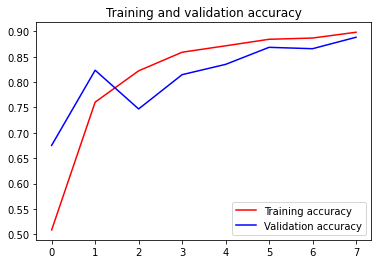

<Figure size 432x288 with 0 Axes>

In [20]:
#ploting the acuuracy plot
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [21]:
# Getting the labels
import numpy as np
test_batches = ImageDataGenerator().flow_from_directory('/content/Fruits')
test_labels = []
for i in range(0,3):
    test_labels.extend(np.array(test_batches[i][1]))
import numpy as np
#print(np.argmax(test_labels))    
print(len(test_labels))

Found 70549 images belonging to 15 classes.
96


In [22]:
test_labels=test_batches.class_indices.keys()
Creating_a_list=[]
for i in range(1):
  Creating_a_list.extend(test_labels)
  
import numpy as np
Creating_a_array=np.array(Creating_a_list)
np.save('Fruits Robust',Creating_a_array)#creating a array and saving 
print(test_labels)
print(" ")
print(Creating_a_list)
print(" ")
print(Creating_a_array)

dict_keys(['Apple', 'Banana', 'Carambola', 'Guava', 'Kiwi', 'Mango', 'Orange', 'Peach', 'Pear', 'Persimmon', 'Pitaya', 'Plum', 'Pomegranate', 'Tomatoes', 'muskmelon'])
 
['Apple', 'Banana', 'Carambola', 'Guava', 'Kiwi', 'Mango', 'Orange', 'Peach', 'Pear', 'Persimmon', 'Pitaya', 'Plum', 'Pomegranate', 'Tomatoes', 'muskmelon']
 
['Apple' 'Banana' 'Carambola' 'Guava' 'Kiwi' 'Mango' 'Orange' 'Peach'
 'Pear' 'Persimmon' 'Pitaya' 'Plum' 'Pomegranate' 'Tomatoes' 'muskmelon']


In [ ]:
from keras.preprocessing import image
test_image = image.load_img('/content/apple.jpeg',target_size=(100,100))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
index_varb=np.argmax(result)
array_varb=np.load('/content/Fruits Robust.npy')
print(array_varb[index_varb])